<a href="https://colab.research.google.com/github/KenitaTC/Keni-Tugas-PYTHON/blob/main/kenita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101194054_Kenita Tri Cahyani_87.pdf'
'1101194054_KENITA TRI CAHYANI.pdf'
'1101194054 KENITA TRI CAHYANI TT-42-G3 soal-4 2.pdf'
'(2) 1101194054 Registrasi | Telkom University (1).pdf'
'(2) 1101194054 Registrasi | Telkom University.pdf'
 2.jpeg
 3scene@
 82CA656A-7AFD-42FB-B5E3-3B9E7C992631.jpeg
 A0A49FDF-89CE-448A-94C7-C15A52E5BC4B.jpeg
 B805A2A7-AC2F-4557-A315-8D5BB028624E.jpeg
'CamScanner 10-01-2020 12.54.22.pdf'
 Classroom/
'Colab Notebooks'/
'ESSAY UTS_KENITA TRI CAHYANI_1101194054 (1).pdf'
'ESSAY UTS_KENITA TRI CAHYANI_1101194054 (2).pdf'
'ESSAY UTS_KENITA TRI CAHYANI_1101194054.pdf'
'Getting started.pdf'
'JARTEL TUGAS 1_ KENITA TRI CAHYANI_1101194054 (1).pdf'
'JARTEL TUGAS 1_ KENITA TRI CAHYANI_1101194054.pdf'
 keni.jpg
'Kenita Tri Cahyani_1101194054_87 (1).pdf'
'Kenita Tri Cahyani_1101194054_87 (2).pdf'
'Kenita Tri Cahyani_1101194054_87 (3).pdf'
'Kenita Tri Cahyani_1101194054_87.pdf'
'KENITA TRI CAHYANI_1101194054.pdf'
'Quiz 1.gdoc'
'ta 1.jpeg'
'WhatsApp Image 2020-10-14 at 22.

In [4]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [7]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [8]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 17ms/step - loss: 1.2447 - accuracy: 0.3713 - val_loss: 1.1615 - val_accuracy: 0.4473
Epoch 2/25
23/23 [==============================] - 0s 10ms/step - loss: 0.9751 - accuracy: 0.5373 - val_loss: 0.8999 - val_accuracy: 0.5443
Epoch 3/25
23/23 [==============================] - 0s 10ms/step - loss: 0.8404 - accuracy: 0.6231 - val_loss: 0.8647 - val_accuracy: 0.5527
Epoch 4/25
23/23 [==============================] - 0s 10ms/step - loss: 0.8046 - accuracy: 0.6385 - val_loss: 0.7976 - val_accuracy: 0.6371
Epoch 5/25
23/23 [==============================] - 0s 10ms/step - loss: 0.7422 - accuracy: 0.6878 - val_loss: 0.6980 - val_accuracy: 0.7173
Epoch 6/25
23/23 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.7229 - val_loss: 0.6949 - val_accuracy: 0.7131
Epoch 7/25
23/23 [==============================] - 0s 10ms/step - loss: 0.6578 - accuracy: 0.7356 - val_loss: 0.6725 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


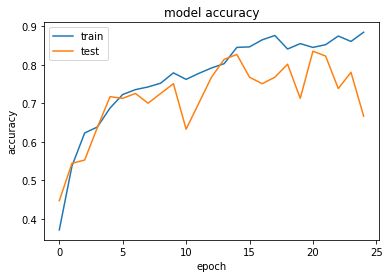

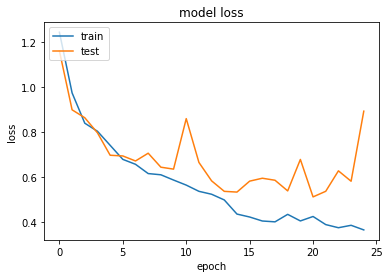

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [15]:
# evaluate the network

print("[INFO] evaluating network...") 
predictions = model.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.71      0.83      0.77        84
      forest       0.95      0.40      0.56        88
     highway       0.52      0.82      0.64        65

    accuracy                           0.67       237
   macro avg       0.73      0.68      0.65       237
weighted avg       0.75      0.67      0.65       237



In [16]:
model.save('model_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_scene/assets


In [18]:
import cv2
import matplotlib.pyplot as plt
image1='keni.jpg'

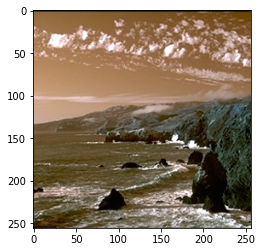

In [19]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [20]:
image_testing = Image.open ('keni.jpg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [22]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.5718146  0.00765686 0.42052856]]
['coast']
